## MOEA/D

### Example

In [1]:
from jmetal.algorithm.multiobjective.moead import MOEAD
from jmetal.operator import PolynomialMutation, DifferentialEvolutionCrossover
from jmetal.problem import LZ09_F2
from jmetal.util.aggregative_function import Tschebycheff
from jmetal.util.termination_criterion import StoppingByEvaluations

problem = LZ09_F2()

max_evaluations = 150000

algorithm = MOEAD(
    problem=problem,
    population_size=300,
    crossover=DifferentialEvolutionCrossover(CR=1.0, F=0.5, K=0.5),
    mutation=PolynomialMutation(probability=1.0 / problem.number_of_variables, distribution_index=20),
    aggregative_function=Tschebycheff(dimension=problem.number_of_objectives),
    neighbor_size=20,
    neighbourhood_selection_probability=0.9,
    max_number_of_replaced_solutions=2,
    weight_files_path='resources/MOEAD_weights',
    termination_criterion=StoppingByEvaluations(max=max_evaluations)
)

algorithm.run()
solutions = algorithm.get_result()

/Users/benhid/.conda/envs/wk/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


We can now visualize the Pareto front approximation:

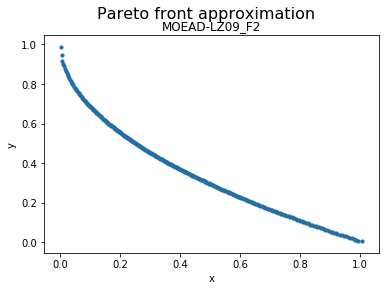

In [3]:
from jmetal.lab.visualization.plotting import Plot
from jmetal.util.solution import get_non_dominated_solutions

front = get_non_dominated_solutions(solutions)
    
plot_front = Plot(plot_title='Pareto front approximation', axis_labels=['x', 'y'])
plot_front.plot(front, label='MOEAD-LZ09_F2')

### API